# Part (b): Introduction to Data Analytics
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com


The assignment has the below problems:
- Problem 1
- Problem 2
- Problem 3
- Problem 4
- Problem 5
- Problem 6

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


# About The Dataset
The below is a sample dataset on the customer satisfaction based on experience from a purchased product.

- CustomerID - Unique identifier of each customer.
- Age: Customers age.
- Gender of the customer.
- Satisfaction Score: On a scale from 1 to 10.
- Purchase Frequency.
- Feedback by the customer.

*Problem 1*

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. In the customer satisfaction dataset, can you classify the columns with missing data into different categories? (MCAR, MNAR or MAR) (1 point)



In [4]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
data <- read.csv("/kaggle/input/customer-satisfaction/customer_satisfaction.csv")
data

CustomerID,Age,Gender,SatisfactionScore,PurchaseFrequency,Feedback
<int>,<int>,<chr>,<int>,<int>,<chr>
101,34,M,8,5,Great Product
102,28,F,8,NA,Good service
103,33,M,2,1,
104,45,F,7,5,Excellent
105,30,M,6,NA,Good
106,35,F,1,NA,
107,40,M,3,1,Poor


# Your answer here.

In the given data, PurchaseFrequency and Feedback have missing values.
In both the coloumns missing data is MCAR, Because the missing data seems to be independent.

# About the dataset

- The below dataset constitute the results of a chemical analysis on wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
- It has been taken from [here](https://archive.ics.uci.edu/dataset/109/wine).

*Features*
- Alcohol: Percentage of alcohol in the wine (vol. %).
- Malic Acid: Concentration of malic acid (g/dm³).
- Ash: Ash content (g/dm³).
- Alcalinity of Ash: Alcalinity of ash (in terms of NaOH) (g/dm³).
- Magnesium: Magnesium content (mg/dm³).
- Total Phenols: Total phenol content (g/dm³).
- Flavanoids: Flavanoid content (g/dm³).
- Nonflavanoid Phenols: Non-flavanoid phenol content (g/dm³).
- Proanthocyanins: Proanthocyanin content (g/dm³).
- Color Intensity: Color intensity of the wine (arbitrary units).
- Hue: Hue of the wine (arbitrary units).
- OD280/OD315 of Diluted Wines: Ratio of optical densities at 280 nm and 315 nm (arbitrary units).
- Proline: Proline content (mg/dm³).

*`Quality`*:
The target class of the alcohol


*Problem 2*

The mean values of the columns `Flavanoids` and `Total_phenols` in the wine dataset are 2.03 and 2.29, respectively. Although these means are nearby, does this imply that the distributions of these two variables are practically equivalent?

To answer this, create a histogram and overlay the probability density curve for each of the 2 variables. Discuss your findings, particularly focusing on the shape and spread of the distributions. Do add a note on the peaks of the histogram. (2 points)



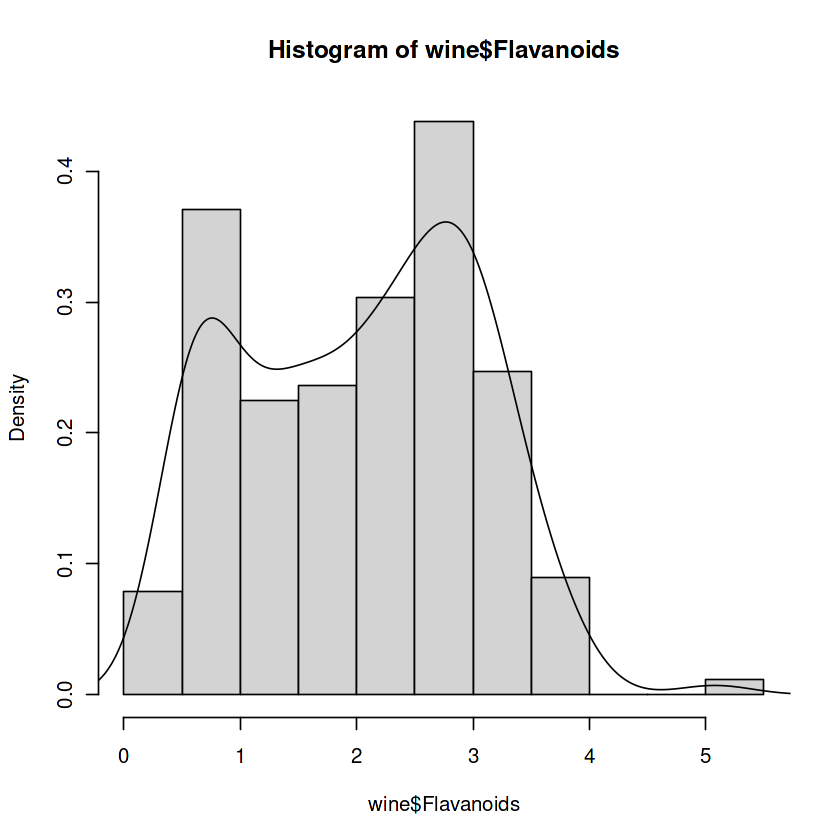

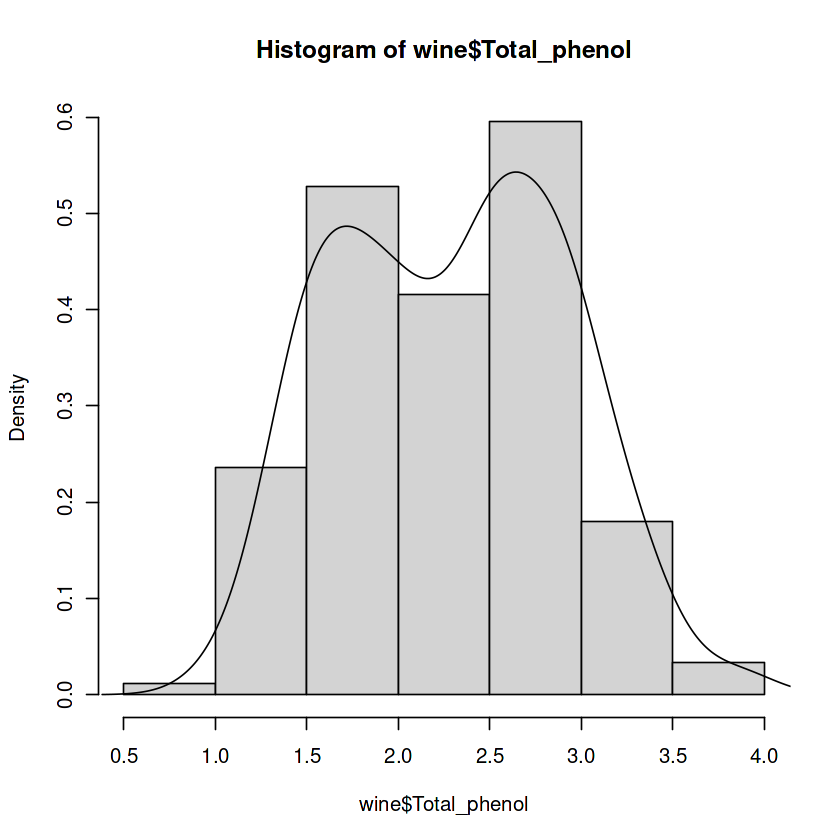

In [2]:
# Your answer here.

wine <- read.csv("/kaggle/input/wine-quality/wine_quality_combined.csv")

hist(wine$Flavanoids, prob = TRUE)
lines(density(wine$Flavanoids))

hist(wine$Total_phenol, prob = TRUE)
lines(density(wine$Total_phenol)) 

# answer in the markdown below 

## Observation : -

In both the histogram the heighest number of data is between 2.5 to 3 class 
But the density in Total_phenol is more than Flavanoids, which implies that there is more data points in Total_phenol

There also appears to be 2 peaks in both the distribution. In Flavanoids the second heighst peak appears between 0.5 to 1 class where as, in Total_phenol the second heighst peak appears between 1.5 to 2 class.

Also note that there appears to be an extreme values in the Flavanoids as we see datapoints beyond class value 5 

*Problem 3*

For the different types of quality of alcohol, compare the distributions of its color intensity. Add a note on the outliers and skewness of each category. You can make use of the box plot. (1 + 1 points)



[1] 1 2 3

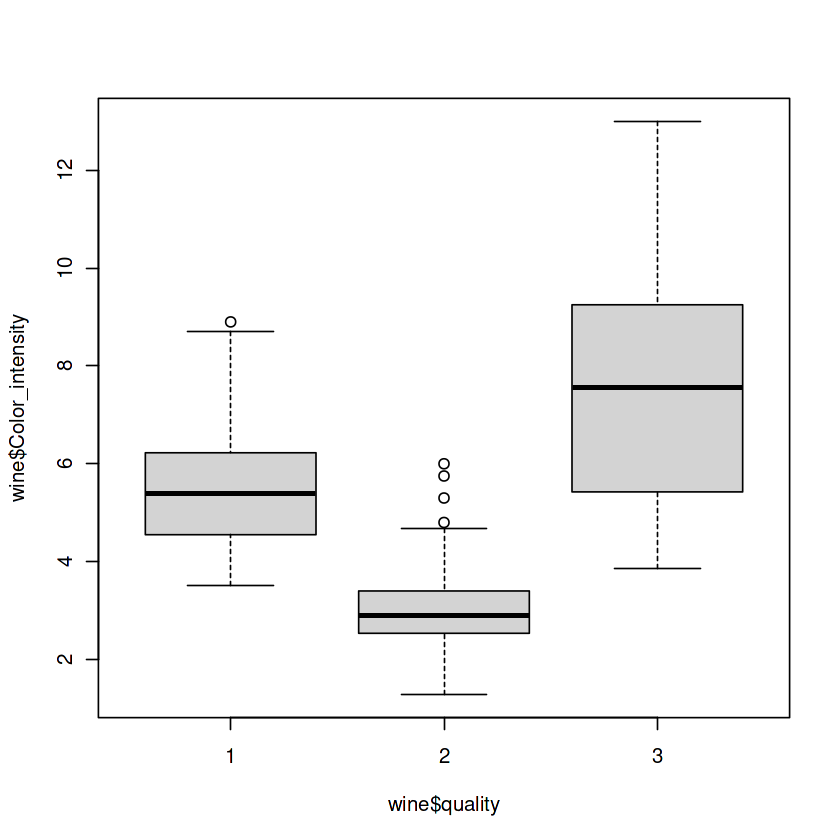

In [32]:
# Your answer here

unique(wine$quality)

boxplot(wine$Color_intensity ~ wine$quality)

#answer in the markdown below 

## Observation :- 

- Wine quality 1 and 2 have outliers (values greater than the maximum of the group).
- Wine quality 1 has 1 outlier datapoint and wine quality 2 has 4 outliers.
- Wine quality 1 and 2 has slight positive skewness wine quality 3 has a negative skew.

*Problem 4*

Explain Dimensionality Reduction. Perform PCA on the dataset and extract the proportion of variance explained by each principal component. How many principal components should be retained based on the `scree plot`? Examine the loadings of the first two principal components. Which variables contribute most to these components? (2 points)

**Hint**:
Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC. 

You can learn more about a scree plot [here](https://sanchitamangale12.medium.com/scree-plot-733ed72c8608)

**Hint**:
In PCA, the contribution of each feature to a principal component is called the `loading`. Loadings are compared with the absolute value



 [1] 0.393901125 0.178577618 0.103563093 0.066288259 0.062612221 0.048047605
 [7] 0.039613764 0.024959798 0.021340814 0.019082196 0.016169373 0.012341067
[13] 0.009358045 0.004145021


,PC1,PC2
Alcohol,-0.136759348,-0.483815991
Malicacid,0.223517788,-0.223063419
Ash,-0.002167986,-0.314558733
Alcalinity_of_ash,0.223881258,0.013920235
Magnesium,-0.125282960,-0.299931209
Total_phenols,-0.360147794,-0.066787531
Flavanoids,-0.391426968,0.001303494
Nonflavanoid_phenols,0.267513383,-0.026576569
Proanthocyanins,-0.279504603,-0.041300575
Color_intensity,0.089582399,-0.529623586


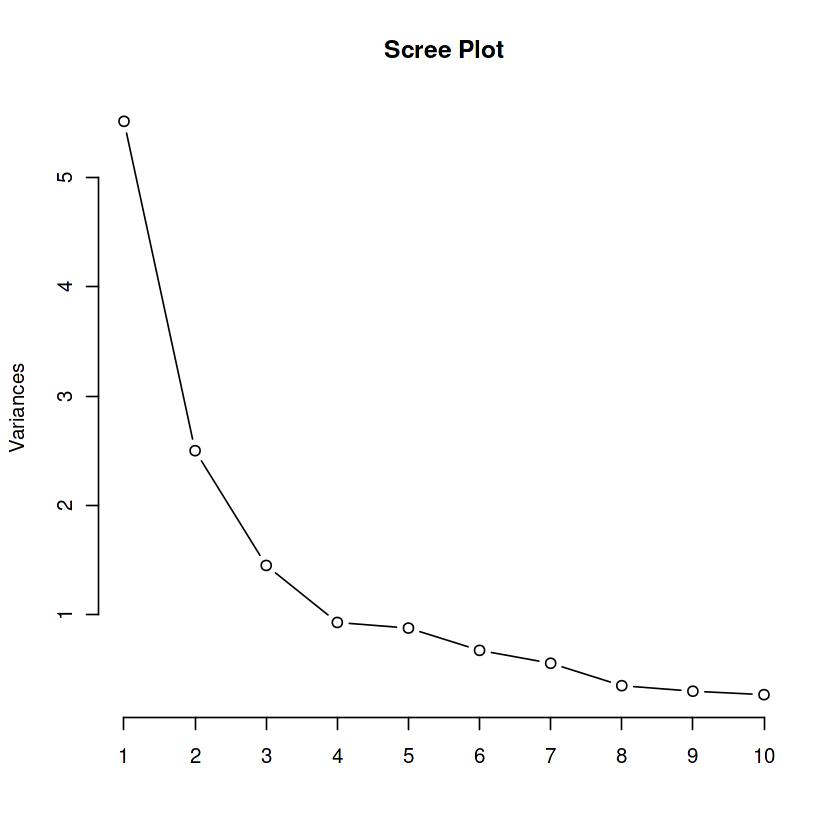

In [5]:
# Your answer here

pcaData <- scale(wine)

pca_result <- prcomp(pcaData, center = TRUE, scale. = TRUE)

explained_variance <- pca_result$sdev^2
proportion_variance_explained <- explained_variance / sum(explained_variance)

print(proportion_variance_explained)

screeplot(pca_result, type = "lines", main = "Scree Plot")

loadings <- pca_result$rotation
head(loadings[, 1:2], 10)

# answer is in the markdown below 

Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving as much information as possible. One of the most common methods for dimensionality reduction is Principal Component Analysis (PCA).

PCA transforms a dataset into a new coordinate system where the greatest variance by any projection of the data comes to lie on the first coordinate (the first principal component), the second greatest variance on the second coordinate, and so on. The principal components are linear combinations of the original variables and are orthogonal to each other.

Based on the scree plot, the principal components should be retained by identifying the "elbow". In this plot, the elbow appears at the third principal component, where after the second component variances doesn't decrese significantly. 

Examining the loadings based on highest absolute loadings :- 

- PC1:- Variables contributing most in PC1 are Flavanoids (-0.3914), Total_phenols (-0.3601), Proanthocyanins (-0.2795), and Nonflavanoid_phenols (0.2675).

- PC2:- Variables contributing most in PC2 are Alcohol (-0.4838), Color_intensity (-0.5296), and Ash (-0.3146).

Interpretation :- 

- PC1 seems to be primarily influenced by the chemical composition of wine.

- PC2 is largely influenced by the visual and sensory characteristics of wine.

*Problem 5* 

Now, for the selected components, find the percentage contribution of each feature to each of the components. (Hint: First find the square of the loadings also known as the cos2 values - find percentage contribution using these values) (2 points)

In [7]:
# Your answer here

cos2_values <- loadings^2

percentage_contribution <- prop.table(cos2_values, margin = 2) * 100

print(percentage_contribution)

                                       PC1          PC2          PC3        PC4
Alcohol                       1.870312e+00 2.340779e+01 4.146374e+00  0.6484397
Malicacid                     4.996020e+00 4.975729e+00 8.354492e-01 21.7957990
Ash                           4.700164e-04 9.894720e+00 3.911408e+01  6.4445257
Alcalinity_of_ash             5.012282e+00 1.937729e-02 3.756292e+01  0.5181491
Magnesium                     1.569582e+00 8.995873e+00 1.727937e+00  2.4340405
Total_phenols                 1.297064e+01 4.460574e-01 2.138890e+00  3.6110868
Flavanoids                    1.532151e+01 1.699097e-04 2.241569e+00  2.0456506
Nonflavanoid_phenols          7.156341e+00 7.063140e-02 2.877176e+00 11.1040586
Proanthocyanins               7.812282e+00 1.705737e-01 2.209662e+00 21.3405704
Color_intensity               8.025006e-01 2.805011e+01 1.803477e+00  0.5365464
Hue                           7.712299e+00 7.709750e+00 6.766238e-01 18.9160898
X0D280_0D315_of_diluted_wines 1.197476e+

*Problem 6*

Generate a plot using the `fviz_pca_var` function to visualize how well each feature is represented by the principal components in the PCA analysis. (Pay attention to the length of the arrows in the fviz_pca_var plot.) (1 point)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘factoextra’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘factoextra’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


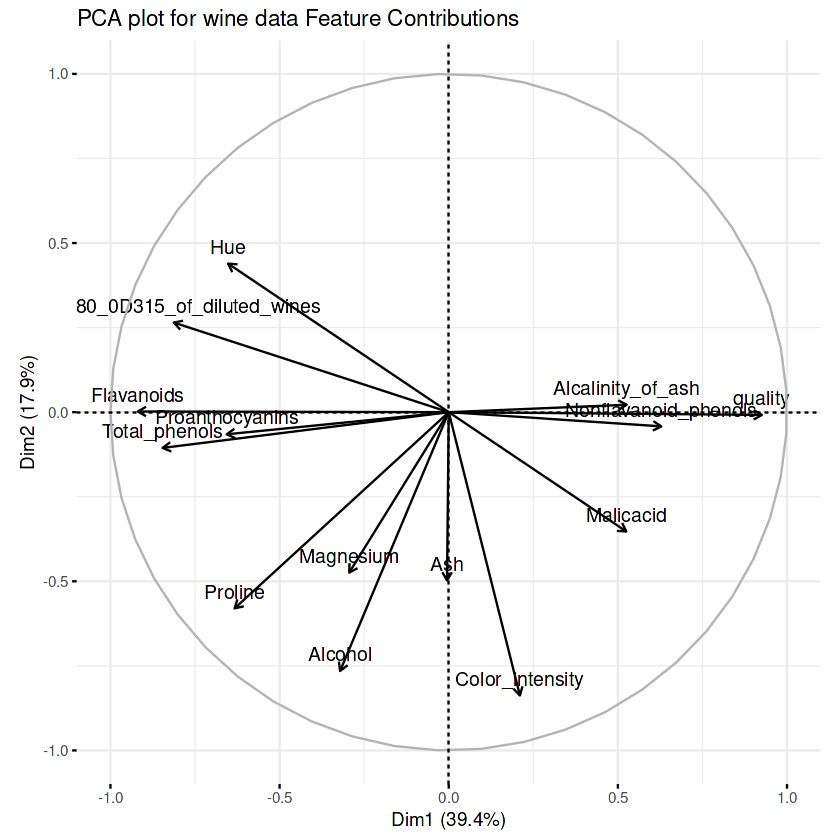

In [11]:
# Your answer here.

install.packages("factoextra")
install.packages("factoextra")
library(factoextra)    

fviz_pca_var(pca_result, addEllipses = FALSE, 
             title = "PCA plot for wine data Feature Contributions")

PCA is performed at times when the dataset is large. The reduced set takes considerably smaller space and shorter time to train classifiers/ regression models with only making use of the most influential data.

*fin*